<a href="https://colab.research.google.com/github/ziyadshezoo/Word2Vec2/blob/main/image_classification_flowers_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification - Flower recognition
- in this notebook I explain how to model an image recognition model using **CNN** .
- you can see the plotting in the end of notebook.
- my notebook hasn't optimal model in this data set. if you want to take an optimal model you can se the edition in future on this notebook.
- if you like my notebook , support my by upvote it.
- **My name is Ziyad Elshazly . Junior Data Scientist**

## Importing libraries and collecting images

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download alxmamaev/flowers-recognition

100% 224M/225M [00:06<00:00, 35.4MB/s]
100% 225M/225M [00:06<00:00, 36.3MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/flowers-recognition.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir('/content/flowers'))

['rose', 'daisy', 'tulip', 'dandelion', 'sunflower']


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import L1,L2
#dl libraraies
from keras import backend as K
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [ ]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/flowers/sunflower'
FLOWER_TULIP_DIR='/content/flowers/tulip'
FLOWER_DANDI_DIR='/content/flowers/dandelion'
FLOWER_ROSE_DIR='/content/flowers/rose'

In [ ]:
def assign_label(img,flower_type):
    return flower_type

In [ ]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (128,128))

        X.append(np.array(img))
        Z.append(str(label))


In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:01<00:00, 540.64it/s]

764


In [ ]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:01<00:00, 445.63it/s]

1497


In [ ]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:01<00:00, 501.00it/s]

2481


In [ ]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:01<00:00, 526.96it/s]

3533


In [ ]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:01<00:00, 544.07it/s]

4317


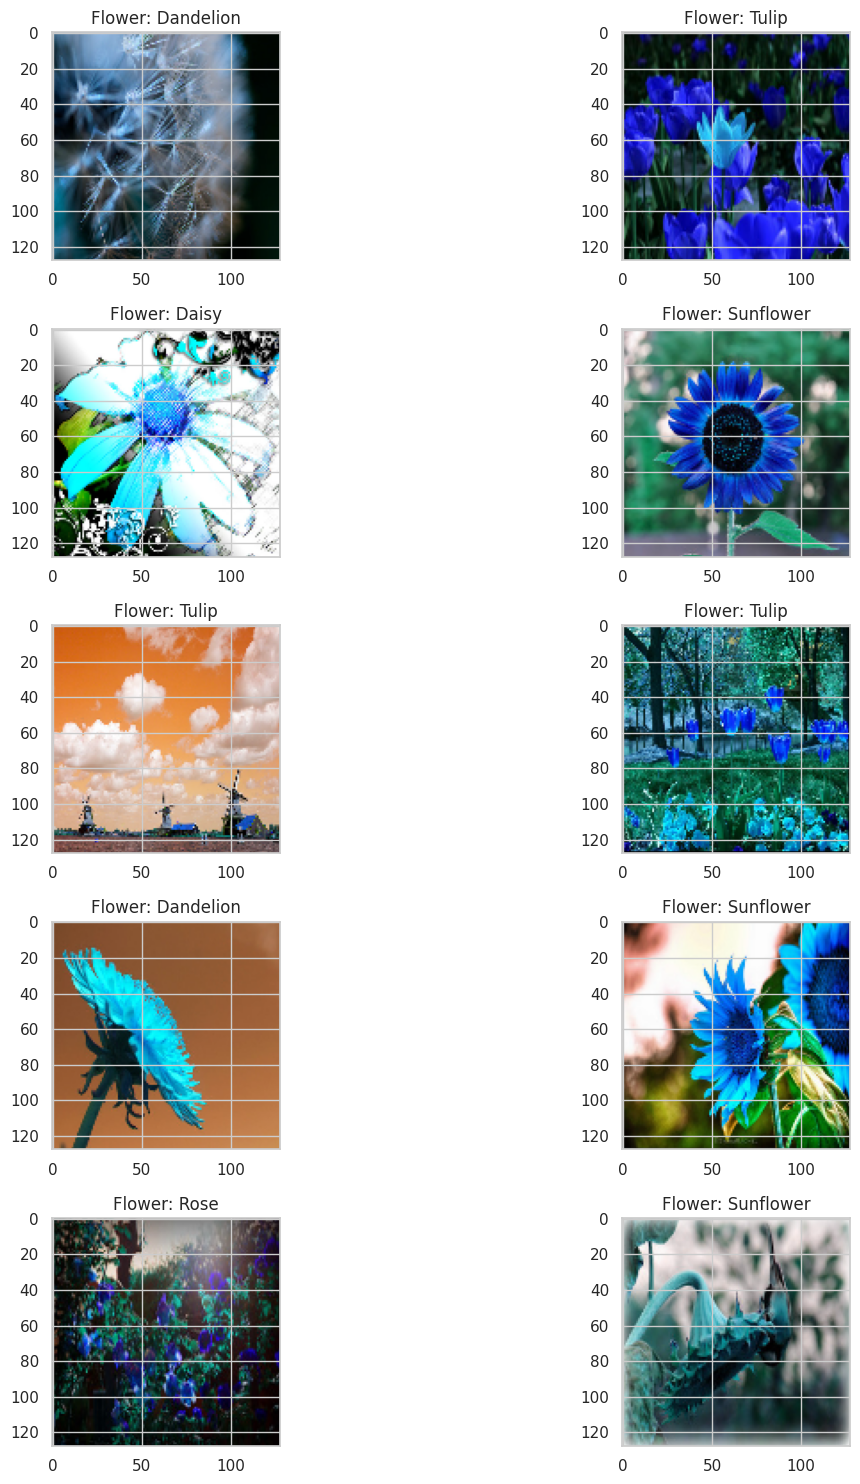

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])

plt.tight_layout()

## preprocessing Dataset

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [ ]:
X.shape

(4317, 128, 128, 3)

In [ ]:
Y.shape

(4317, 5)

## Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

## **modeling**
- you see I use Conv@D to convolution images.
- using Maxpooling2D to reduce the size and resolution of images.
- flatten to make data set 1 dimension.

In [ ]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (128,128,3), activation='relu'))
# model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
#
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
#
model.add(BatchNormalization())
# model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
#
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())
model.add(Dropout(.25))
model.add(Dense(100, activation='relu', kernel_regularizer=L2(0.01)))
# model.add(Dense(200, activation='relu', kernel_regularizer=L2(0.01)))
# model.add(Dense(400, activation='relu', kernel_regularizer=L2(0.01)))
model.add(Dense(500, activation='relu', kernel_regularizer=L2(0.01)))
model.add(BatchNormalization())
# model.add(Dense(400, activation='relu', kernel_regularizer=L2(0.01)))
# model.add(Dense(200, activation='relu', kernel_regularizer=L2(0.01)))
# model.add(Dropout(.25))

model.add(Dense(100, activation='relu', kernel_regularizer=L2(0.01)))
model.add(Dropout(.25))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(5, activation='softmax'))



In [ ]:
batch_size=100
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [ ]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 conv2d_25 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 conv2d_26 (Conv2D)          (None, 122, 122, 32)      9248      
                                                                 
 conv2d_27 (Conv2D)          (None, 120, 120, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 60, 60, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 58, 58, 64)        18496     
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## ImageGenerator to prevent Overfitting

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
# History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),epochs = epochs, validation_data = (x_test,y_test),verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/50
102/102 [==============================] - 31s 223ms/step - loss: 14.0703 - accuracy: 0.3973 - val_loss: 10.6002 - val_accuracy: 0.2778
Epoch 2/50
102/102 [==============================] - 21s 202ms/step - loss: 7.4951 - accuracy: 0.4878 - val_loss: 5.6251 - val_accuracy: 0.4778
Epoch 3/50
102/102 [==============================] - 21s 203ms/step - loss: 4.9358 - accuracy: 0.5422 - val_loss: 4.3567 - val_accuracy: 0.4454
Epoch 4/50
102/102 [==============================] - 21s 203ms/step - loss: 4.3495 - accuracy: 0.5604 - val_loss: 4.1227 - val_accuracy: 0.3713
Epoch 5/50
102/102 [==============================] - 21s 203ms/step - loss: 3.4521 - accuracy: 0.5975 - val_loss: 4.2483 - val_accuracy: 0.2778
Epoch 6/50
 99/102 [============================>.] - ETA: 0s - loss: 7.4895 - accuracy: 0.5234

KeyboardInterrupt: ignored

In [ ]:
df_N=pd.DataFrame(model.history.history)
df_N.head()

,loss,accuracy,val_loss,val_accuracy
0,8.122592,0.279248,5.732839,0.353704
1,4.631153,0.375199,3.705261,0.355556
2,3.232239,0.391138,2.830709,0.378704
3,2.599074,0.407396,2.381397,0.437037
4,2.275530,0.423334,2.131720,0.397222


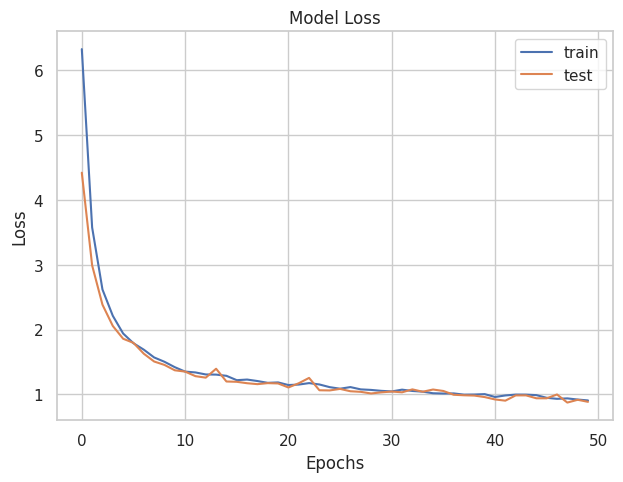

In [ ]:
plt.plot(df_N['loss'])
plt.plot(df_N['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

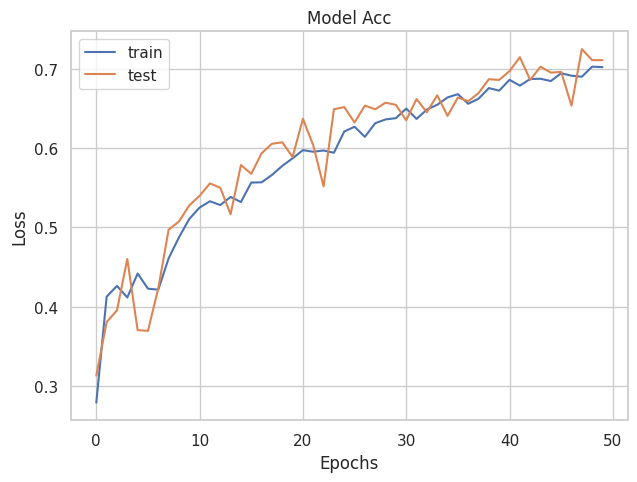

In [ ]:
plt.plot(df_N['accuracy'])
plt.plot(df_N['val_accuracy'])
plt.title('Model Acc')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [ ]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

In [ ]:
y_test1=np.copy(y_test)
print(y_test1.shape)
y_test1.flatten()

In [ ]:
prop_class1=np.copy(prop_class)
print(prop_class1.shape)
prop_class1.flatten()

In [ ]:
pred_digits.shape

In [ ]:
y_test.shape

In [ ]:
model.evaluate(x_test,y_test)

## Finally
- my trying to make the model accuracy bigger depend on my knowledge ,if you can advise me to high performance you can put comment on dataset.
